In [101]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [102]:
df = pd.read_csv('D:/Programs/python/Data_Science/Car price prediction/car.csv', encoding='latin1')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [104]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [105]:
#checking for null values
df.isnull().sum()


name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [106]:
#null values is not too much so we can drop them
df.dropna(inplace=True)


In [107]:
df.info() # no null vvalues in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    object
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [108]:
#checking for duplicate values
df.duplicated().sum()

92

In [109]:
#returning the duplicate values
df[df.duplicated()]

,name,company,year,Price,kms_driven,fuel_type
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
15,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
20,Mahindra Scorpio S10,Mahindra,2016,"3,50,000","43,000 kms",Diesel
24,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
25,Hyundai i20 Sportz 1.2,Hyundai,2012,"1,00,000","55,000 kms",Petrol
...,...,...,...,...,...,...
626,Tata Sumo Gold EX BS IV,Tata,2012,"2,10,000","75,000 kms",Diesel
641,Maruti Suzuki Swift VDi BS IV,Maruti,2012,"2,80,000","48,006 kms",Diesel
727,Mahindra Scorpio S4,Mahindra,2015,"8,65,000","30,000 kms",Diesel
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol


In [110]:
#dropping the duplicate values
df.drop_duplicates(inplace=True)

In [111]:
df.info() # no duplicate values in the dataset

<class 'pandas.core.frame.DataFrame'>
Index: 745 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        745 non-null    object
 1   company     745 non-null    object
 2   year        745 non-null    object
 3   Price       745 non-null    object
 4   kms_driven  745 non-null    object
 5   fuel_type   745 non-null    object
dtypes: object(6)
memory usage: 40.7+ KB


In [112]:
#checking for unique values in the dataset
df.nunique()

name          473
company        25
year           21
Price         273
kms_driven    256
fuel_type       3
dtype: int64

There are 473 unique name of the cars in the dataset varies from 25 distinct companies and 3 different fuel types 

In [113]:
df['Price'].value_counts() 

Price
Ask For Price    21
2,50,000         13
1,30,000         11
3,50,000         11
4,00,000         10
                 ..
7,70,000          1
3,35,000          1
6,35,000          1
65,000            1
5,00,001          1
Name: count, Length: 273, dtype: int64

In [114]:
#removing 'ask for price ' from the price column
df = df[df['Price'] != 'Ask For Price']
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        724 non-null    object
 1   company     724 non-null    object
 2   year        724 non-null    object
 3   Price       724 non-null    object
 4   kms_driven  724 non-null    object
 5   fuel_type   724 non-null    object
dtypes: object(6)
memory usage: 39.6+ KB


In [116]:
#converting the price column to integer type and KMS driven to integer type 

df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16508\420416633.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace('₹', '').str.replace(',', '').astype(int)


In [117]:
type(df['Price'][0])

numpy.int32

In [118]:
df['kms_driven']  = df['kms_driven'].str.split(' ').str.get(0).str.replace(',', '').astype(int)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16508\1111165762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']  = df['kms_driven'].str.split(' ').str.get(0).str.replace(',', '').astype(int)


In [119]:
type(df['kms_driven'][0] )

numpy.int32

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        724 non-null    object
 1   company     724 non-null    object
 2   year        724 non-null    object
 3   Price       724 non-null    int32 
 4   kms_driven  724 non-null    int32 
 5   fuel_type   724 non-null    object
dtypes: int32(2), object(4)
memory usage: 50.1+ KB


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


                                     name   company  year   Price  kms_driven  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007   80000       45000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006  425000          40   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014  325000       28000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014  575000       36000   
6                               Ford Figo      Ford  2012  175000       41000   

  fuel_type  
0    Petrol  
1    Diesel  
3    Petrol  
4    Diesel  
6    Diesel  
              Price     kms_driven
count  7.240000e+02     724.000000
mean   4.032451e+05   46791.342541
std    4.802936e+05   34575.416435
min    3.000000e+04       0.000000
25%    1.650000e+05   27000.000000
50%    2.900000e+05   42000.000000
75%    4.899990e+05   59000.000000
max    8.500003e+06  400000.000000


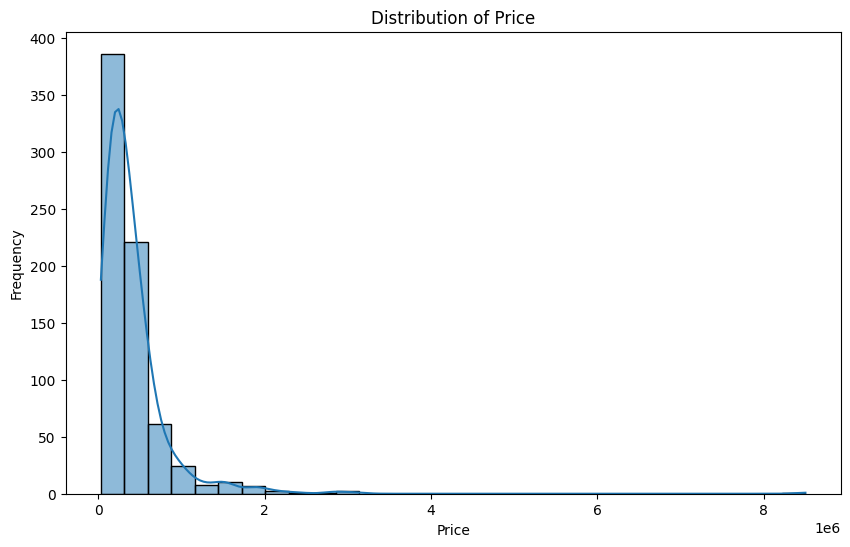

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


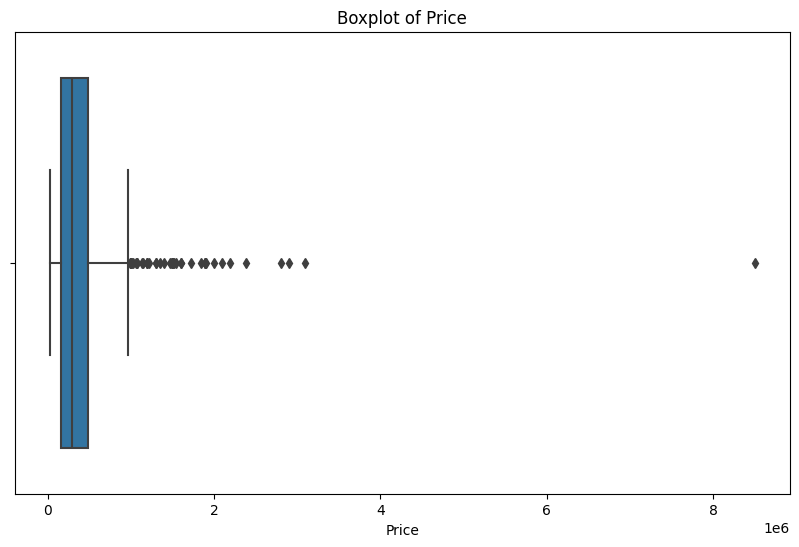

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


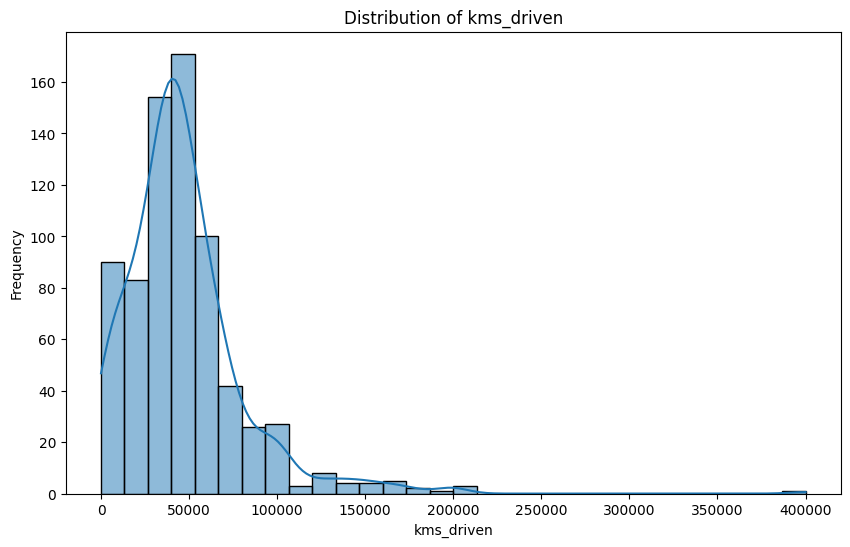

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


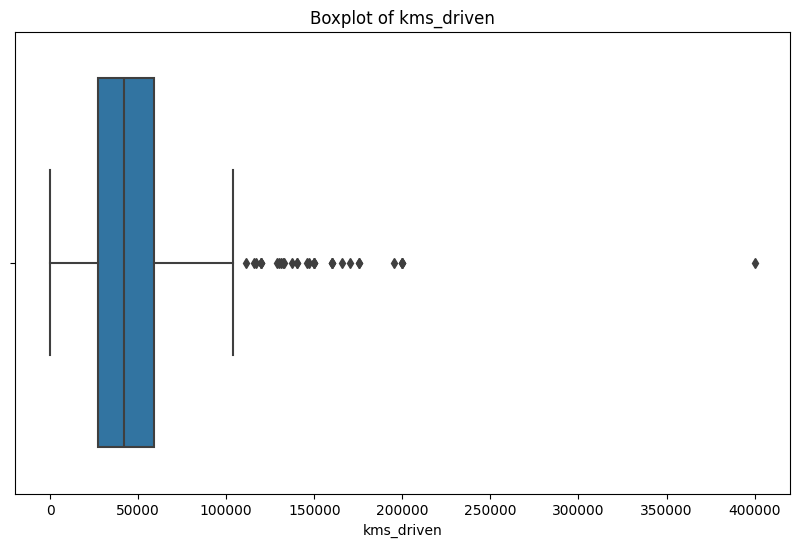

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


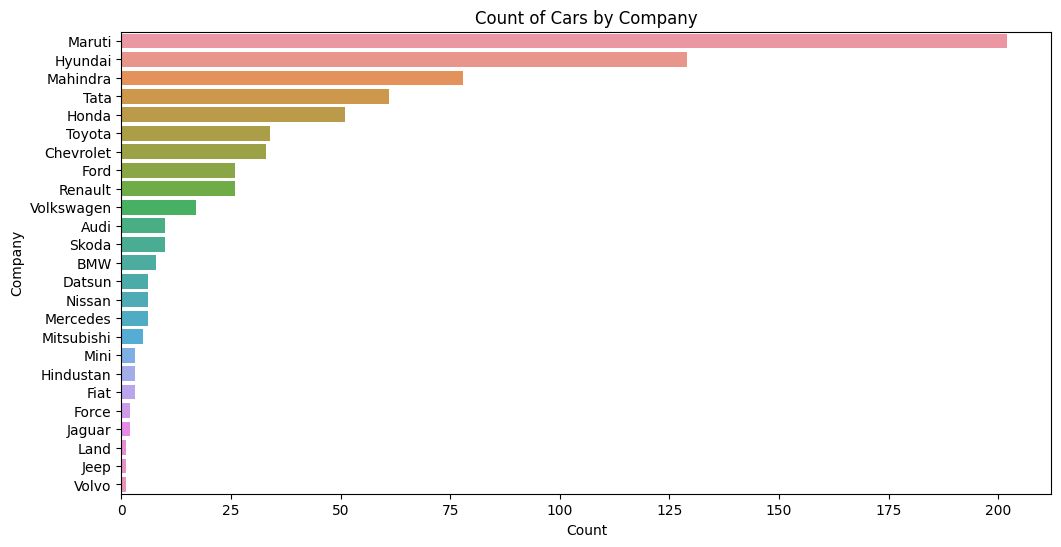

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


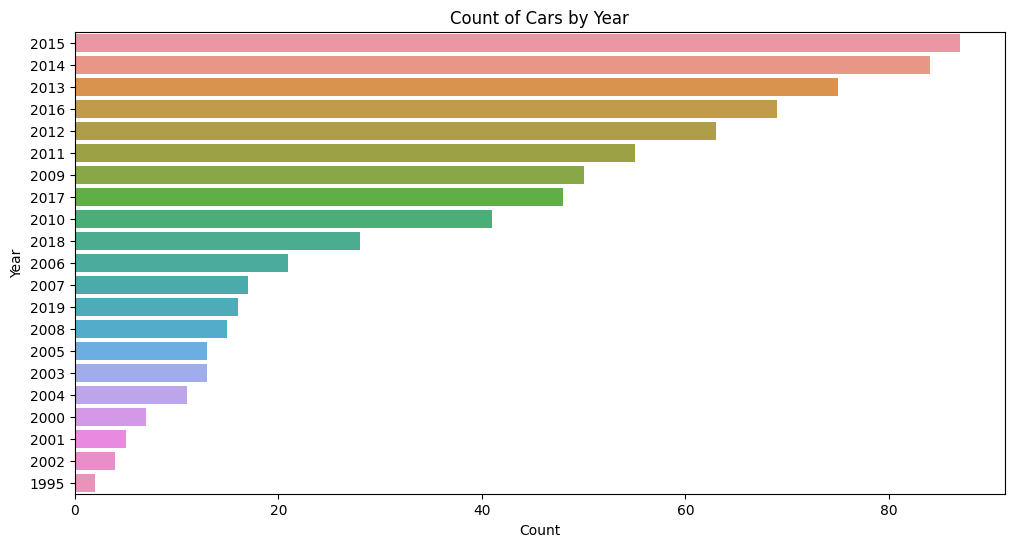

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


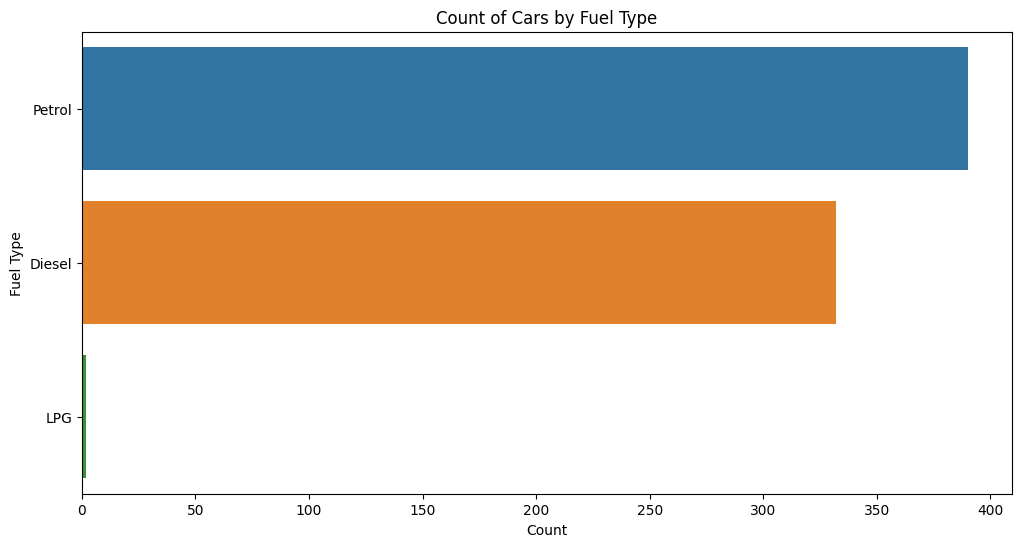

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


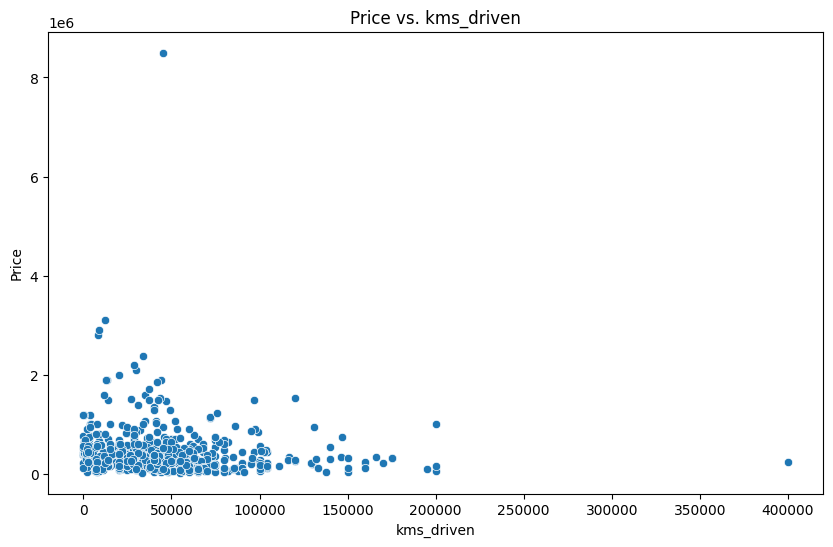

               Price  kms_driven
Price       1.000000   -0.123645
kms_driven -0.123645    1.000000


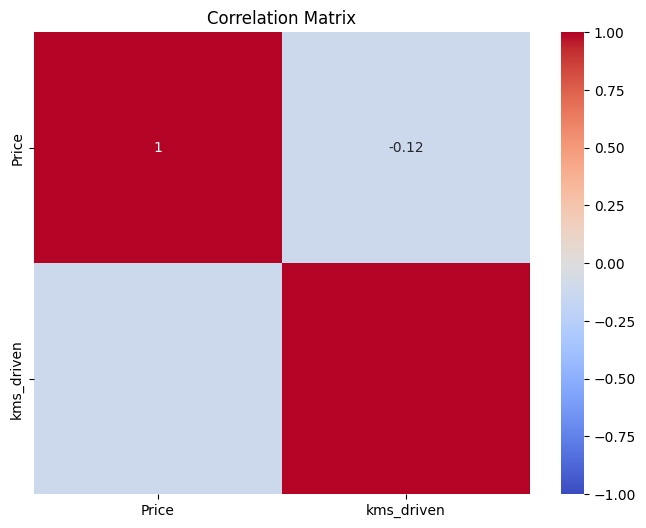

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is loaded into a DataFrame called df
# df = pd.read_csv('your_data.csv')

# Display first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=df)
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Distribution of kms_driven
plt.figure(figsize=(10, 6))
sns.histplot(df['kms_driven'], kde=True, bins=30)
plt.title('Distribution of kms_driven')
plt.xlabel('kms_driven')
plt.ylabel('Frequency')
plt.show()

# Boxplot for kms_driven
plt.figure(figsize=(10, 6))
sns.boxplot(x='kms_driven', data=df)
plt.title('Boxplot of kms_driven')
plt.xlabel('kms_driven')
plt.show()

# Bar plot for categorical features
plt.figure(figsize=(12, 6))
sns.countplot(y='company', data=df, order=df['company'].value_counts().index)
plt.title('Count of Cars by Company')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='year', data=df, order=df['year'].value_counts().index)
plt.title('Count of Cars by Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='fuel_type', data=df, order=df['fuel_type'].value_counts().index)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

# Scatter plot of Price vs. kms_driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='Price', data=df)
plt.title('Price vs. kms_driven')
plt.xlabel('kms_driven')
plt.ylabel('Price')
plt.show()

# Correlation matrix
correlation_matrix = df[['Price', 'kms_driven']].corr()
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Prices and KMS driven are contaning outliers so we can remove them 


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


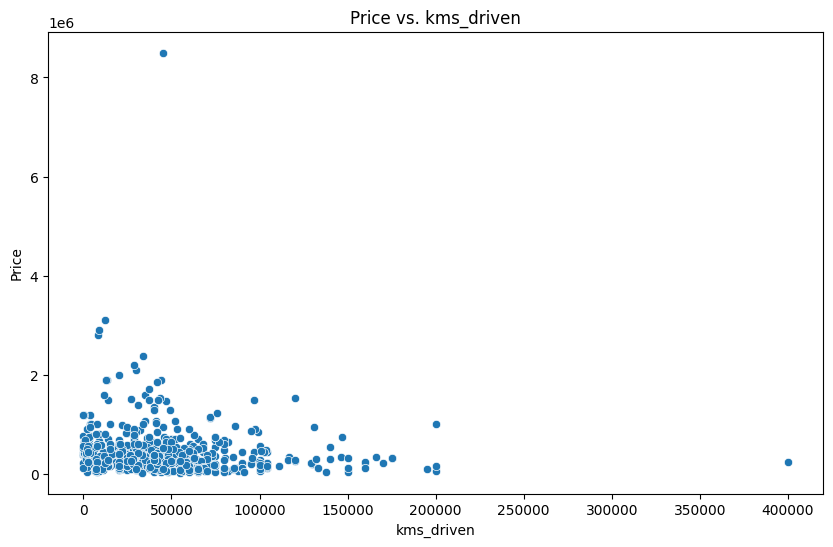

In [122]:
# Scatter plot of Price vs. kms_driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='Price', data=df)
plt.title('Price vs. kms_driven')
plt.xlabel('kms_driven')
plt.ylabel('Price')
plt.show()

In [124]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Calculate Q1, Q3, and IQR for 'Price'
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Calculate Q1, Q3, and IQR for 'KMS Driven'
Q1_kms = df['kms_driven'].quantile(0.25)
Q3_kms = df['kms_driven'].quantile(0.75)
IQR_kms = Q3_kms - Q1_kms

# Define bounds for 'Price' and 'KMS Driven'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
lower_bound_kms = Q1_kms - 1.5 * IQR_kms
upper_bound_kms = Q3_kms + 1.5 * IQR_kms

# Filter out outliers
df_filtered = df[(df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price) & 
                 (df['kms_driven'] >= lower_bound_kms) & (df['kms_driven'] <= upper_bound_kms)]

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


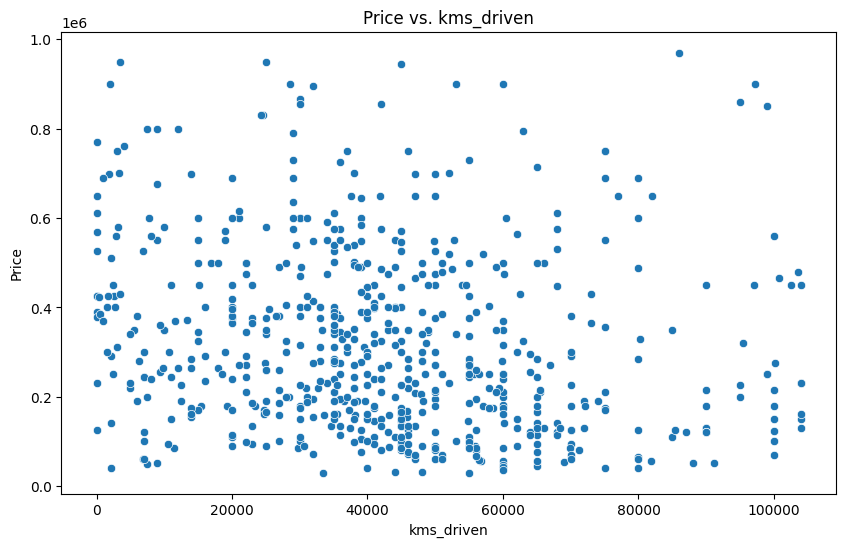

In [126]:
#After removing outliers, you can visualize the scatter plot again:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='Price', data=df_filtered)
plt.title('Price vs. kms_driven')
plt.xlabel('kms_driven')
plt.ylabel('Price')
plt.show()

In [130]:
df_filtered.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
7,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
8,Ford EcoSport Ambiente 1.5L TDCi,Ford,2016,830000,24530,Diesel
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,250000,60000,Petrol
10,Skoda Fabia Classic 1.2 MPI,Skoda,2010,182000,60000,Petrol
11,Maruti Suzuki Stingray VXi,Maruti,2015,315000,30000,Petrol


In [149]:
from wolta.data_tools import make_numerics 
df_filtered['Price'] = make_numerics(df_filtered['Price'])
df_filtered['kms_driven'] = make_numerics(df_filtered['kms_driven'])
df_filtered['year'] = make_numerics(df_filtered['year'])
df_filtered['fuel_type'] = make_numerics(df_filtered['fuel_type'])
df_filtered['company'] = make_numerics(df_filtered['company'])
df_filtered['name'] = make_numerics(df_filtered['name'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_16508\3287786608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Price'] = make_numerics(df_filtered['Price'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16508\3287786608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['kms_driven'] = make_numerics(df_filtered['kms_driven'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_16508\3287786608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [151]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 650 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   name        650 non-null    int64
 1   company     650 non-null    int64
 2   year        650 non-null    int64
 3   Price       650 non-null    int64
 4   kms_driven  650 non-null    int64
 5   fuel_type   650 non-null    int64
dtypes: int64(6)
memory usage: 35.5 KB


In [154]:
#training testing split 
from sklearn.model_selection import train_test_split
y = df_filtered['Price']
X = df_filtered.drop('Price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [155]:
#model Selection 
from wolta.model_tools import compare_models

compare_models('clf',
              ['all'],
              ['acc', 'precision', 'recall'],
              X_train, y_train, X_test, y_test)


CatBoost
Accuracy Score: 0.007692307692307693
Precision Score: 0.0038461538461538464
Recall Score: 0.007692307692307693
***


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost
Accuracy Score: 0.023076923076923078
Precision Score: 0.000576923076923077
Recall Score: 0.023076923076923078
***
Decision Tree
Accuracy Score: 0.007692307692307693
Precision Score: 0.002564102564102564
Recall Score: 0.007692307692307693
***


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

Random Forest
Accuracy Score: 0.015384615384615385
Precision Score: 0.011538461538461539
Recall Score: 0.015384615384615385
***


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LightGBM
Accuracy Score: 0.007692307692307693
Precision Score: 0.007692307692307693
Recall Score: 0.007692307692307693
***
Extra Tree
Accuracy Score: 0.015384615384615385
Precision Score: 0.007692307692307693
Recall Score: 0.015384615384615385
***


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

Logistic Regression
Accuracy Score: 0.0
Precision Score: 0.0
Recall Score: 0.0
***
KNN
Accuracy Score: 0.007692307692307693
Precision Score: 0.015384615384615385
Recall Score: 0.007692307692307693
***
GaussianNB
Accuracy Score: 0.015384615384615385
Precision Score: 0.020512820512820513
Recall Score: 0.015384615384615385
***
Ridge
Accuracy Score: 0.007692307692307693
Precision Score: 0.0010256410256410256
Recall Score: 0.007692307692307693
***
BernoulliNB
Accuracy Score: 0.007692307692307693
Precision Score: 0.00044378698224852074
Recall Score: 0.007692307692307693
***
SVC
Accuracy Score: 0.015384615384615385
Precision Score: 0.0007759784075573549
Recall Score: 0.015384615384615385
***
Perceptron
Accuracy Score: 0.007692307692307693
Precision Score: 8.012820512820513e-05
Recall Score: 0.007692307692307693
***
MultinomialNB
Accuracy Score: 0.015384615384615385
Precision Score: 0.011538461538461539
Recall Score: 0.015384615384615385
***


C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Example data preprocessing steps
X = df.drop('Price', axis=1)  # Assuming 'Price' is the target variable
y = df['Price']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Addressing class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Model training with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_smote, y_train_smote)

# Model evaluation
y_pred = grid_search.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="macro")}')

ValueError: could not convert string to float: 'Maruti Suzuki Swift Dzire VDi'